# App Store Data Challenge

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
!ls ../challenge_data/

Data challenge instructions - AR.pdf device_ref.csv
account_dat.csv                      in-app_dat.csv
app_dat.csv                          transaction_dat.csv
category_ref.csv


In [3]:
df_account = pd.read_csv('../challenge_data/account_dat.csv')
df_app = pd.read_csv('../challenge_data/app_dat.csv')
df_category = pd.read_csv('../challenge_data/category_ref.csv')
df_device = pd.read_csv('../challenge_data/device_ref.csv')
df_in_app = pd.read_csv('../challenge_data/in-app_dat.csv')
df_transaction = pd.read_csv('../challenge_data/transaction_dat.csv')

In [4]:
df_account.head()

,acct_id,create_dt,payment_type
0,eb23e449d274bddb,4/3/12,PMOF
1,3d60dcb8494a0d70,8/31/09,PMOF
2,9b6d6fbf76504d85,11/6/08,PMOF
3,343255370828b380,1/3/12,PMOF
4,664e27f05189c387,10/31/10,PMOF


In [5]:
df_app.head()

,app_name,content_id,category_id,device_id
0,half-slouched having,22dfac9721b899cb,Y-8,3
1,lift whale-ships,7c645810cd7f166e,M-7,3
2,mightily community,c495bcb878faffaa,Y-8,2
3,session: too--shall,4e683dcd461cdd22,Y-8,1
4,That Zoology,6473dd29a2badbf1,Y-8,3


In [6]:
df_in_app.head()

,parent_app_content_id,content_id,type
0,d2bde35599e0dae9,227227a77c59809b,consumable
1,d2bde35599e0dae9,41ac2362a2600185,consumable
2,d2bde35599e0dae9,64a8e16f030bb611,consumable
3,d2bde35599e0dae9,2c8ba424183afa7c,consumable
4,d2bde35599e0dae9,b4c42fa5cc420f7b,consumable


In [7]:
df_category.head()

,category_name,category_id
0,Games,Z-1
1,Social Networking,Q-5
2,Utilities,M-7
3,Entertainment,Q-1
4,Photos & Videos,Y-8


### Denormalize data 3 dataframes
1. df_app_denorm: dataframe with info on category, content, and device
2. df_trn_denorm: dataframe with transactions, account, and device
3. df_wide: dataframe with all columns

In [8]:
# cast date columns as datetime objects
df_account['create_dt'] = pd.to_datetime(df_account['create_dt'])
df_transaction['create_dt'] = pd.to_datetime(df_transaction['create_dt'])

df_app_denorm = df_in_app.join(df_app.set_index('content_id'), on='parent_app_content_id')\
                .join(df_category.set_index('category_id'), on='category_id')\
                .join(df_device.set_index('device_id'), on='device_id')

df_trn_denorm = df_transaction.join(df_device.set_index('device_id'), on='device_id')\
                    .join(df_account.set_index('acct_id'), on='acct_id', lsuffix='_transaction', rsuffix='_acct')

df_wide = df_trn_denorm.join(df_app_denorm.drop(columns=['device_id','device_name'])\
                             .set_index('content_id'), on='content_id')

In [9]:
df_app_denorm.head()

,parent_app_content_id,content_id,type,app_name,category_id,device_id,category_name,device_name
0,d2bde35599e0dae9,227227a77c59809b,consumable,lactantem prevailing,Z-1,3,Games,Both
1,d2bde35599e0dae9,41ac2362a2600185,consumable,lactantem prevailing,Z-1,3,Games,Both
2,d2bde35599e0dae9,64a8e16f030bb611,consumable,lactantem prevailing,Z-1,3,Games,Both
3,d2bde35599e0dae9,2c8ba424183afa7c,consumable,lactantem prevailing,Z-1,3,Games,Both
4,d2bde35599e0dae9,b4c42fa5cc420f7b,consumable,lactantem prevailing,Z-1,3,Games,Both


In [10]:
df_trn_denorm.head()

,create_dt_transaction,content_id,acct_id,price,device_id,device_name,create_dt_acct,payment_type
0,2016-08-28,b6cf4f33e7455df4,220574a7a6a71afa,11.99,1,iPhone,2009-08-29,PMOF
1,2016-09-16,71ac3e9c38ddbbba,8551f69a5015ea6a,1.99,2,iPad,2011-05-28,PMOF
2,2016-08-15,776b851b916c33d1,7dedf309494a1966,0.99,2,iPad,2009-11-15,PMOF
3,2016-06-17,7a47ca132a8dc695,7174a81c796dcf7e,1.99,2,iPad,2009-03-01,PMOF
4,2016-06-13,30581219bc952dbb,35aaf59d64a677e7,11.99,2,iPad,2010-10-01,PMOF


In [59]:
df_wide.head()

,create_dt_transaction,content_id,acct_id,price,device_id,device_name,create_dt_acct,payment_type,parent_app_content_id,type,app_name,category_id,category_name
0,2016-08-28,b6cf4f33e7455df4,220574a7a6a71afa,11.99,1,iPhone,2009-08-29,PMOF,61cea77b9bc843d1,subscription,events Bildad's,M-7,Utilities
1,2016-09-16,71ac3e9c38ddbbba,8551f69a5015ea6a,1.99,2,iPad,2011-05-28,PMOF,1f0ebd67df5846cd,consumable,swell questionably,M-7,Utilities
2,2016-08-15,776b851b916c33d1,7dedf309494a1966,0.99,2,iPad,2009-11-15,PMOF,1383e4f2f49f0f44,consumable,supperless--my Shipmates,Z-1,Games
3,2016-06-17,7a47ca132a8dc695,7174a81c796dcf7e,1.99,2,iPad,2009-03-01,PMOF,8590a25d4e5c249c,consumable,unwritten hungry,Z-1,Games
4,2016-06-13,30581219bc952dbb,35aaf59d64a677e7,11.99,2,iPad,2010-10-01,PMOF,478e10f9248b7842,consumable,Turning thanked,Q-1,Entertainment


In [12]:
df_wide.create_dt_acct

0         2009-08-29
1         2011-05-28
2         2009-11-15
3         2009-03-01
4         2010-10-01
             ...    
3607504   2011-06-18
3607505   2010-01-25
3607506   2012-02-08
3607507   2007-08-29
3607508   2009-01-23
Name: create_dt_acct, Length: 3607509, dtype: datetime64[ns]

In [36]:
df_wide[['content_id', 'payment_type']].groupby(by=['payment_type']).count()

,content_id
payment_type,
Free only,1167271
PMOF,2437496


In [20]:
# confirm that Free only has no price
df_wide[['price', 'payment_type']].groupby(by=['payment_type']).sum()

,price
payment_type,
Free only,0.00
PMOF,19037307.25


In [55]:
df_wide[['content_id', 'payment_type', 'type']].groupby(by=['payment_type', 'type']).count()

content_id
payment_type type                    
PMOF         consumable       1820631
             subscription      191210

In [21]:
df_wide[['price', 'payment_type', 'type']].groupby(by=['payment_type', 'type']).sum()

price
payment_type type                     
PMOF         consumable    16797973.69
             subscription   1214154.90

<AxesSubplot:>

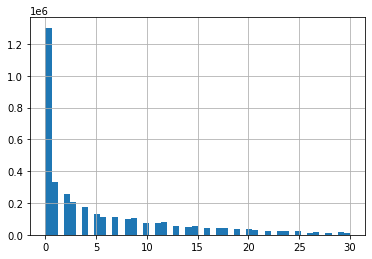

In [46]:
df_trn_denorm['price'].hist(bins=50)

In [48]:
df_trn_denorm[['price', 'content_id']].groupby(by=['price']).count().sort_values(by='price')

,content_id
price,
0.00,1302194
0.99,332492
1.99,255790
2.99,204189
3.99,173033
4.99,131962
5.99,110628
6.99,110397
7.99,97863


In [22]:
df_wide.app_name.nunique()

474

In [23]:
df_wide.create_dt_transaction.min()

Timestamp('2016-06-01 00:00:00')

In [24]:
df_wide.create_dt_transaction.max()

Timestamp('2016-09-21 00:00:00')

In [25]:
df_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3607509 entries, 0 to 3607508
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   create_dt_transaction  datetime64[ns]
 1   content_id             object        
 2   acct_id                object        
 3   price                  float64       
 4   device_id              int64         
 5   device_name            object        
 6   create_dt_acct         datetime64[ns]
 7   payment_type           object        
 8   parent_app_content_id  object        
 9   type                   object        
 10  app_name               object        
 11  category_id            object        
 12  category_name          object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(9)
memory usage: 357.8+ MB


In [26]:
df_wide[['acct_id', 'payment_type', 'type']].groupby(by=['payment_type', 'type']).nunique()

acct_id
payment_type type                 
PMOF         consumable      14982
             subscription    14982

In [30]:
df_wide[df_wide['type'] == 'subscription']['acct_id'].head()

0     220574a7a6a71afa
10    7c004e23347f8cb4
42    8050627aaebd03ec
44    fd390bfb0290aa33
48    e488c4251e5ed684
Name: acct_id, dtype: object

In [27]:
df_wide.acct_id.nunique()

30000

In [31]:
df_wide[df_wide['acct_id'] == '8050627aaebd03ec']

,create_dt_transaction,content_id,acct_id,price,device_id,device_name,create_dt_acct,payment_type,parent_app_content_id,type,app_name,category_id,category_name
42,2016-07-21,46a72469d6747411,8050627aaebd03ec,8.99,1,iPhone,2008-03-29,PMOF,64a419e7440109f9,subscription,pry AMERICA,Q-1,Entertainment
520,2016-06-22,02287dc66736c41d,8050627aaebd03ec,2.99,1,iPhone,2008-03-29,PMOF,1f0ebd67df5846cd,consumable,swell questionably,M-7,Utilities
14865,2016-09-16,9464a17a955d8835,8050627aaebd03ec,19.99,1,iPhone,2008-03-29,PMOF,4164b62f665e1181,consumable,one-half hearts',Z-1,Games
38956,2016-08-02,42748b15beecf642,8050627aaebd03ec,1.99,1,iPhone,2008-03-29,PMOF,80bdd67b6063c7ca,consumable,dim serpent-snapping,Y-8,Photos & Videos
54664,2016-07-20,b8938dadf2ae3e62,8050627aaebd03ec,3.99,1,iPhone,2008-03-29,PMOF,ac9b3b9697787ad8,consumable,animals levels,Z-1,Games
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561491,2016-08-04,7ba542812ee5767b,8050627aaebd03ec,4.99,2,iPad,2008-03-29,PMOF,08a1ebbb1e6e26cd,consumable,INDIRECT this--what,Z-1,Games
3574099,2016-06-19,e3cab7eabde18cd2,8050627aaebd03ec,10.99,1,iPhone,2008-03-29,PMOF,9b553c5b5953f150,consumable,button sensitive,Z-1,Games
3579247,2016-08-03,f9029ad440d066d5,8050627aaebd03ec,15.99,1,iPhone,2008-03-29,PMOF,85f1da2246f1f10a,consumable,taxes emigrants,Z-1,Games
3582994,2016-07-13,2ca245388845351d,8050627aaebd03ec,12.99,1,iPhone,2008-03-29,PMOF,62bbc9735ee184a4,consumable,aright Davy,Z-1,Games


In [34]:
df_wide[df_wide['type'] == 'subscription']['app_name'].unique().shape

(60,)

In [35]:
df_wide[df_wide['type'] == 'consumable']['app_name'].unique().shape

(414,)

## Investigate payment_type

In [63]:
df_wide[df_wide['payment_type'] == 'PMOF']

,create_dt_transaction,content_id,acct_id,price,device_id,device_name,create_dt_acct,payment_type,parent_app_content_id,type,app_name,category_id,category_name
0,2016-08-28,b6cf4f33e7455df4,220574a7a6a71afa,11.99,1,iPhone,2009-08-29,PMOF,61cea77b9bc843d1,subscription,events Bildad's,M-7,Utilities
1,2016-09-16,71ac3e9c38ddbbba,8551f69a5015ea6a,1.99,2,iPad,2011-05-28,PMOF,1f0ebd67df5846cd,consumable,swell questionably,M-7,Utilities
2,2016-08-15,776b851b916c33d1,7dedf309494a1966,0.99,2,iPad,2009-11-15,PMOF,1383e4f2f49f0f44,consumable,supperless--my Shipmates,Z-1,Games
3,2016-06-17,7a47ca132a8dc695,7174a81c796dcf7e,1.99,2,iPad,2009-03-01,PMOF,8590a25d4e5c249c,consumable,unwritten hungry,Z-1,Games
4,2016-06-13,30581219bc952dbb,35aaf59d64a677e7,11.99,2,iPad,2010-10-01,PMOF,478e10f9248b7842,consumable,Turning thanked,Q-1,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607504,2016-07-11,330640111f15f83e,42f1c3996d40fa49,27.99,1,iPhone,2011-06-18,PMOF,26e319612f771cb6,consumable,October genial,Z-1,Games
3607505,2016-08-05,2364a51706a7f5a3,63f4e3bbaf70abbe,2.99,1,iPhone,2010-01-25,PMOF,e59d81210fdc5594,consumable,flogging biscuit,Z-1,Games
3607506,2016-06-28,26aebfbbaec60a96,402001eac02d9f8a,6.99,2,iPad,2012-02-08,PMOF,8590a25d4e5c249c,consumable,unwritten hungry,Z-1,Games
3607507,2016-06-09,77ee563bf7d7c534,514434e3ad0b8e64,2.99,2,iPad,2007-08-29,PMOF,a79e0d352f7fa8bc,consumable,remote remaining,Z-1,Games


In [61]:
df_wide[df_wide['payment_type'] == 'Free only']

,create_dt_transaction,content_id,acct_id,price,device_id,device_name,create_dt_acct,payment_type,parent_app_content_id,type,app_name,category_id,category_name
1752513,2016-08-19,1f6c4142d53f86d8,9744bbc81e980e62,0.0,2,iPad,2013-06-30,Free only,NaN,NaN,NaN,NaN,NaN
1752514,2016-06-01,e7789212c7ae3a27,9ea14e08fccf1744,0.0,1,iPhone,2014-11-25,Free only,NaN,NaN,NaN,NaN,NaN
1752515,2016-08-31,973b3c5b875124d7,2ce32572b8c05773,0.0,1,iPhone,2016-02-14,Free only,NaN,NaN,NaN,NaN,NaN
1752516,2016-09-05,18573ca62bdc4b57,677d3ab6eca9e1b3,0.0,2,iPad,2013-03-15,Free only,NaN,NaN,NaN,NaN,NaN
1752517,2016-09-14,a2f5435e63872446,222c99662138a386,0.0,1,iPhone,2015-08-16,Free only,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920889,2016-07-08,b3aee7c1086c0237,1eaf9b5cbe9ef7d2,0.0,1,iPhone,2017-06-07,Free only,NaN,NaN,NaN,NaN,NaN
2920890,2016-09-18,ed4dd6eaa31b07ac,edd5f596bdc072f2,0.0,2,iPad,2017-03-17,Free only,NaN,NaN,NaN,NaN,NaN
2920891,2016-08-13,641c23bc07b4683d,dc3fc7891fe8dfce,0.0,2,iPad,2013-04-11,Free only,NaN,NaN,NaN,NaN,NaN
2920892,2016-08-14,0c204b2454654e0a,c9192fc140ba8b64,0.0,1,iPhone,2013-06-29,Free only,NaN,NaN,NaN,NaN,NaN


In [65]:
df_wide[df_wide['payment_type'] == 'PMOF']['content_id'].unique().shape

(2689,)

In [64]:
df_wide[df_wide['payment_type'] == 'Free only']['content_id'].unique().shape

(224,)

In [75]:
df_wide[df_wide['payment_type'] == 'Free only']['category_name'].unique()

array([nan], dtype=object)

In [69]:
# free only content is not purchaseable

np.count_nonzero(np.isin(df_wide[df_wide['payment_type'] == 'PMOF']['content_id'].unique(),
df_wide[df_wide['payment_type'] == 'Free only']['content_id'].unique()))

0

In [72]:
df_wide[(df_wide['payment_type'] == 'PMOF') & (df_wide['content_id'] == '1f6c4142d53f86d8')]

,create_dt_transaction,content_id,acct_id,price,device_id,device_name,create_dt_acct,payment_type,parent_app_content_id,type,app_name,category_id,category_name


In [62]:
df_wide[df_wide['payment_type'].isnull()]

,create_dt_transaction,content_id,acct_id,price,device_id,device_name,create_dt_acct,payment_type,parent_app_content_id,type,app_name,category_id,category_name
1208,2016-07-02,a792117e156607c2,9488918622974672,2.99,1,iPhone,NaT,NaN,21ae2d63b7280de1,consumable,Sleet's perceived,Q-5,Social Networking
2511,2016-07-14,cc6e70d345f85276,4349884688257852,3.99,1,iPhone,NaT,NaN,d9ac236641bd3859,consumable,words: hospitable,Z-1,Games
2714,2016-06-01,03230f058d847c64,1620038656801380,12.99,1,iPhone,NaT,NaN,9f209b69e6c6de9e,consumable,STARTTHE butter--twenty,Z-1,Games
3335,2016-06-08,02f812e3c914b878,1919129874916410,8.99,1,iPhone,NaT,NaN,65b4d55761b9b52c,consumable,clayey courteously,Z-1,Games
4216,2016-08-19,fa35fc98975a6c4e,1984215081970279,14.99,1,iPhone,NaT,NaN,ac9b3b9697787ad8,consumable,animals levels,Z-1,Games
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597503,2016-06-04,ec1daca234e3478b,4722279452604405,11.99,1,iPhone,NaT,NaN,dbfe06aef68805a7,consumable,Dan disease,Z-1,Games
3601223,2016-08-30,cbfbd041ab4c6183,8287202711385408,4.99,1,iPhone,NaT,NaN,606831f2120952a9,consumable,AS-IS vagueness,Z-1,Games
3602626,2016-08-29,3e195280a0a7d577,4907866555694471,10.99,2,iPad,NaT,NaN,c468c1ba007914f3,consumable,authority quality,Z-1,Games
3605113,2016-06-20,feacaa282731ff97,8287202711385408,25.99,2,iPad,NaT,NaN,8590a25d4e5c249c,consumable,unwritten hungry,Z-1,Games


In [60]:
df_wide['payment_type'].unique()

array(['PMOF', nan, 'Free only'], dtype=object)

In [73]:
df_wide.isna().sum()

create_dt_transaction          0
content_id                     0
acct_id                        0
price                          0
device_id                      0
device_name                    0
create_dt_acct              2742
payment_type                2742
parent_app_content_id    1594364
type                     1594364
app_name                 1594364
category_id              1594364
category_name            1594364
dtype: int64

## Investigate Subscription Accounts
all price>0 transactions are from subscription accounts?

In [39]:
acct_sub = df_wide[df_wide['type'] == 'subscription']['acct_id'].unique()

In [49]:
df_wide[df_wide['acct_id'].isin(acct_sub)]['price'].count()

2439128

In [42]:
df_wide[df_wide['acct_id'].isin(acct_sub)]['price'].sum()

19049491.849999975

In [52]:
df_wide[df_wide['acct_id'].isin(acct_sub)]['price'].sum()/df_wide[df_wide['acct_id'].isin(acct_sub)]['price'].count()

7.809959891403803

In [51]:
df_wide[~df_wide['acct_id'].isin(acct_sub)]['price'].count()

1168381

In [50]:
df_wide[~df_wide['acct_id'].isin(acct_sub)]['price'].sum()

0.0

In [79]:
df_wide[(df_wide['acct_id'].isin(acct_sub)) &
       (df_wide['payment_type'] == 'Free only')]['content_id'].count()

0

In [85]:
df_wide[(df_wide['acct_id'].isin(acct_sub)) &
       ~(df_wide['payment_type'] == 'Free only')]

,create_dt_transaction,content_id,acct_id,price,device_id,device_name,create_dt_acct,payment_type,parent_app_content_id,type,app_name,category_id,category_name
0,2016-08-28,b6cf4f33e7455df4,220574a7a6a71afa,11.99,1,iPhone,2009-08-29,PMOF,61cea77b9bc843d1,subscription,events Bildad's,M-7,Utilities
1,2016-09-16,71ac3e9c38ddbbba,8551f69a5015ea6a,1.99,2,iPad,2011-05-28,PMOF,1f0ebd67df5846cd,consumable,swell questionably,M-7,Utilities
2,2016-08-15,776b851b916c33d1,7dedf309494a1966,0.99,2,iPad,2009-11-15,PMOF,1383e4f2f49f0f44,consumable,supperless--my Shipmates,Z-1,Games
3,2016-06-17,7a47ca132a8dc695,7174a81c796dcf7e,1.99,2,iPad,2009-03-01,PMOF,8590a25d4e5c249c,consumable,unwritten hungry,Z-1,Games
4,2016-06-13,30581219bc952dbb,35aaf59d64a677e7,11.99,2,iPad,2010-10-01,PMOF,478e10f9248b7842,consumable,Turning thanked,Q-1,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607504,2016-07-11,330640111f15f83e,42f1c3996d40fa49,27.99,1,iPhone,2011-06-18,PMOF,26e319612f771cb6,consumable,October genial,Z-1,Games
3607505,2016-08-05,2364a51706a7f5a3,63f4e3bbaf70abbe,2.99,1,iPhone,2010-01-25,PMOF,e59d81210fdc5594,consumable,flogging biscuit,Z-1,Games
3607506,2016-06-28,26aebfbbaec60a96,402001eac02d9f8a,6.99,2,iPad,2012-02-08,PMOF,8590a25d4e5c249c,consumable,unwritten hungry,Z-1,Games
3607507,2016-06-09,77ee563bf7d7c534,514434e3ad0b8e64,2.99,2,iPad,2007-08-29,PMOF,a79e0d352f7fa8bc,consumable,remote remaining,Z-1,Games
